In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 as pretrainedModel , preprocess_input

In [2]:
from tensorflow.keras.layers import Flatten, Dense

In [3]:
from keras import models
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.preprocessing import image

In [5]:
train_path = '/content/data/train'

In [6]:
valid_path = '/content/data/test'

In [22]:
image_size= [75,75]

In [23]:
from glob import glob

In [24]:
imageFiles = glob( train_path + '/*/*.jpeg')

In [25]:
imageFiles

['/content/data/train/ill/6.jpeg',
 '/content/data/train/ill/3.jpeg',
 '/content/data/train/ill/2.jpeg',
 '/content/data/train/ill/4.jpeg',
 '/content/data/train/ill/5.jpeg',
 '/content/data/train/ill/1.jpeg',
 '/content/data/train/normal/6.jpeg',
 '/content/data/train/normal/3.jpeg',
 '/content/data/train/normal/2.jpeg',
 '/content/data/train/normal/4.jpeg',
 '/content/data/train/normal/5.jpeg',
 '/content/data/train/normal/1.jpeg']

In [26]:
validFiles = glob( valid_path + '/*/*.jpeg')

In [27]:
validFiles

['/content/data/test/ill/6.jpeg',
 '/content/data/test/ill/3.jpeg',
 '/content/data/test/ill/2.jpeg',
 '/content/data/test/ill/4.jpeg',
 '/content/data/test/ill/5.jpeg',
 '/content/data/test/ill/1.jpeg',
 '/content/data/test/normal/6.jpeg',
 '/content/data/test/normal/3.jpeg',
 '/content/data/test/normal/2.jpeg',
 '/content/data/test/normal/4.jpeg',
 '/content/data/test/normal/5.jpeg',
 '/content/data/test/normal/1.jpeg']

In [28]:
folders = glob(train_path + '/*')

In [29]:
folders

['/content/data/train/ill', '/content/data/train/normal']

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np

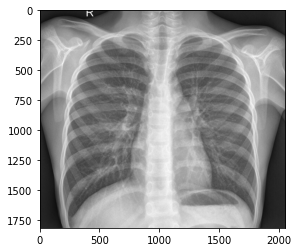

In [18]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [30]:
ptm = pretrainedModel(
    
input_shape = image_size + [3],
weights= 'imagenet',
include_top = False



)

87910968/87910968 [==============================] - 4s 0us/step


In [31]:
ptm.trainable = False

In [32]:
k = len(folders)

In [33]:
x = Flatten()(ptm.output)
x = Dense(k, activation = 'softmax')(x)
model = Model (inputs = ptm.input, outputs = x)

In [34]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  preprocessing_function= preprocess_input


)

In [35]:
batchsize = 128

In [36]:
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize




)

Found 12 images belonging to 2 classes.


In [37]:
valid_generator = gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize



)

Found 12 images belonging to 2 classes.


In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [39]:
r = model.fit_generator(train_generator, validation_data= valid_generator, epochs =8)

<ipython-input-39-8afd815bf134>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data= valid_generator, epochs =8)


Epoch 1/8
1/1 [==============================] - 8s 8s/step - loss: 0.7412 - accuracy: 0.6667 - val_loss: 0.7385 - val_accuracy: 0.4167
Epoch 2/8
1/1 [==============================] - 1s 1s/step - loss: 0.9590 - accuracy: 0.5000 - val_loss: 1.1018 - val_accuracy: 0.1667
Epoch 3/8
1/1 [==============================] - 1s 795ms/step - loss: 0.5839 - accuracy: 0.6667 - val_loss: 0.8632 - val_accuracy: 0.4167
Epoch 4/8
1/1 [==============================] - 1s 1s/step - loss: 0.5110 - accuracy: 0.7500 - val_loss: 0.9710 - val_accuracy: 0.6667
Epoch 5/8
1/1 [==============================] - 1s 1s/step - loss: 0.6054 - accuracy: 0.7500 - val_loss: 0.7824 - val_accuracy: 0.5000
Epoch 6/8
1/1 [==============================] - 1s 1s/step - loss: 0.3898 - accuracy: 0.8333 - val_loss: 0.6793 - val_accuracy: 0.7500
Epoch 7/8
1/1 [==============================] - 1s 1s/step - loss: 0.4598 - accuracy: 0.7500 - val_loss: 0.7663 - val_accuracy: 0.6667
Epoch 8/8
1/1 [==============================

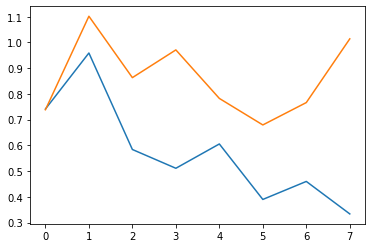

In [40]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

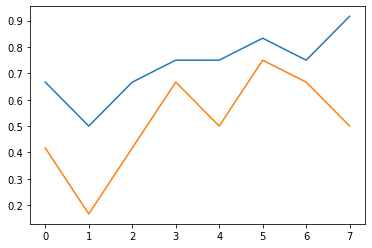

In [41]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')